In [59]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import math
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Cost Functions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Preprocessing
from sklearn.impute import SimpleImputer

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [60]:
stc = pd.read_csv("HandestsSTC.csv")

In [61]:
stc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   CAL_DT            1048575 non-null  object
 1   MODEL_NAME        1048575 non-null  object
 2   BRAND_FULL_NAME   1048575 non-null  object
 3   BRAND_NAME        1048575 non-null  object
 4   VENDOR_NAME       1048575 non-null  object
 5   OS_NAME           1048575 non-null  object
 6   DEVICE_TYPE       1048575 non-null  object
 7   _2G_FLG           1048575 non-null  object
 8   _3G_FLG           1048575 non-null  object
 9   _4G_FLG           1048575 non-null  object
 10  WIFI_FLG          1048575 non-null  object
 11  BLUETOOTH_FLG     1048575 non-null  object
 12  TOUCH_SCREEN_FLG  1048575 non-null  object
 13  DUAL_SIM_FLG      1048575 non-null  object
 14  GENDER_TYPE_CD    939245 non-null   object
 15  AGE_B             1048575 non-null  object
 16  NATIONALITY_CD    

In [62]:
stc.isna().sum()

CAL_DT                   0
MODEL_NAME               0
BRAND_FULL_NAME          0
BRAND_NAME               0
VENDOR_NAME              0
OS_NAME                  0
DEVICE_TYPE              0
_2G_FLG                  0
_3G_FLG                  0
_4G_FLG                  0
WIFI_FLG                 0
BLUETOOTH_FLG            0
TOUCH_SCREEN_FLG         0
DUAL_SIM_FLG             0
GENDER_TYPE_CD      109330
AGE_B                    0
NATIONALITY_CD      122866
NATIONALITY_NAME    122642
SAUDI_NON_SAUDI        493
DEVICE_COUNT           489
dtype: int64

In [63]:
stc.describe()

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,AGE_B,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,939245,1048575,925709,925933,1048082,1048086
unique,24,825,1061,205,114,15,6,6,6,5,6,4,4,3,4,8,206,210,43,2078
top,6/30/2019,One x9,Pro Edition,Nokia,Google,Android,Smartphone,Y,Y,N,Y,Y,Y,Y,Male,36-55,IND,India,Non-Saudi,1
freq,50969,1712,2337,249867,619471,619471,707772,1042229,721128,572605,731780,966535,700537,744691,653638,306523,77367,77367,908116,473326


In [64]:
stc.describe(exclude='number')

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,AGE_B,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,939245,1048575,925709,925933,1048082,1048086
unique,24,825,1061,205,114,15,6,6,6,5,6,4,4,3,4,8,206,210,43,2078
top,6/30/2019,One x9,Pro Edition,Nokia,Google,Android,Smartphone,Y,Y,N,Y,Y,Y,Y,Male,36-55,IND,India,Non-Saudi,1
freq,50969,1712,2337,249867,619471,619471,707772,1042229,721128,572605,731780,966535,700537,744691,653638,306523,77367,77367,908116,473326


In [65]:
stc_d=stc.copy()

In [66]:
stc_d.duplicated().sum()

2293

In [67]:
stc_d.drop_duplicates(inplace=True)

In [68]:
stc_d.duplicated().sum()

0

In [69]:
stc_d.dropna(axis=0,inplace=True)

In [70]:
stc_d.isna().sum()

CAL_DT              0
MODEL_NAME          0
BRAND_FULL_NAME     0
BRAND_NAME          0
VENDOR_NAME         0
OS_NAME             0
DEVICE_TYPE         0
_2G_FLG             0
_3G_FLG             0
_4G_FLG             0
WIFI_FLG            0
BLUETOOTH_FLG       0
TOUCH_SCREEN_FLG    0
DUAL_SIM_FLG        0
GENDER_TYPE_CD      0
AGE_B               0
NATIONALITY_CD      0
NATIONALITY_NAME    0
SAUDI_NON_SAUDI     0
DEVICE_COUNT        0
dtype: int64

In [71]:
stc_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836526 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   CAL_DT            836526 non-null  object
 1   MODEL_NAME        836526 non-null  object
 2   BRAND_FULL_NAME   836526 non-null  object
 3   BRAND_NAME        836526 non-null  object
 4   VENDOR_NAME       836526 non-null  object
 5   OS_NAME           836526 non-null  object
 6   DEVICE_TYPE       836526 non-null  object
 7   _2G_FLG           836526 non-null  object
 8   _3G_FLG           836526 non-null  object
 9   _4G_FLG           836526 non-null  object
 10  WIFI_FLG          836526 non-null  object
 11  BLUETOOTH_FLG     836526 non-null  object
 12  TOUCH_SCREEN_FLG  836526 non-null  object
 13  DUAL_SIM_FLG      836526 non-null  object
 14  GENDER_TYPE_CD    836526 non-null  object
 15  AGE_B             836526 non-null  object
 16  NATIONALITY_CD    836526 non-null  ob

Text(0.5, 0, 'Device type')

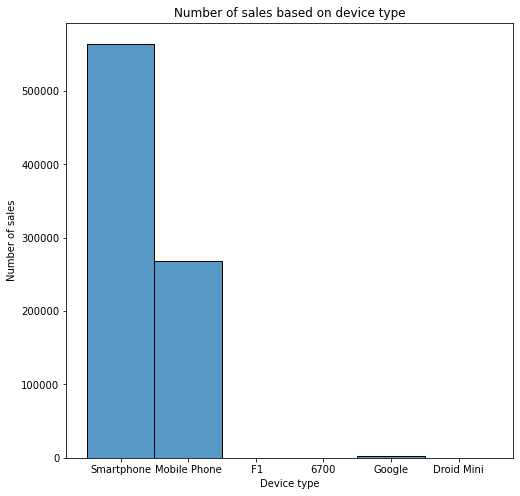

In [72]:
#Histogram chart
plt.figure(figsize=(8,8))
sns.histplot(data=stc_d, x='DEVICE_TYPE')
plt.title("Number of sales based on device type")
plt.ylabel("Number of sales")
plt.xlabel("Device type")

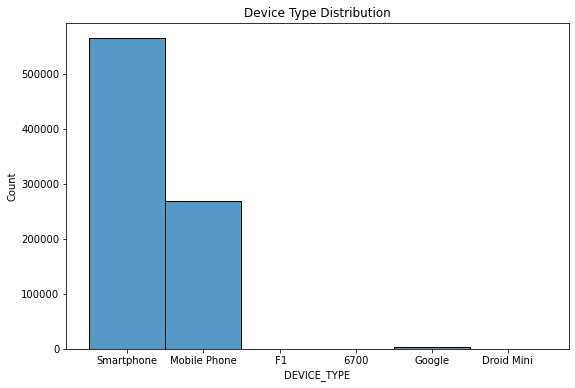

In [73]:
plt.figure(figsize=(9,6))
sns.histplot(data=stc_d, x="DEVICE_TYPE", palette='rainbow')
plt.title('Device Type Distribution')
plt.show()

Text(0.5, 0, 'Counts of Devices')

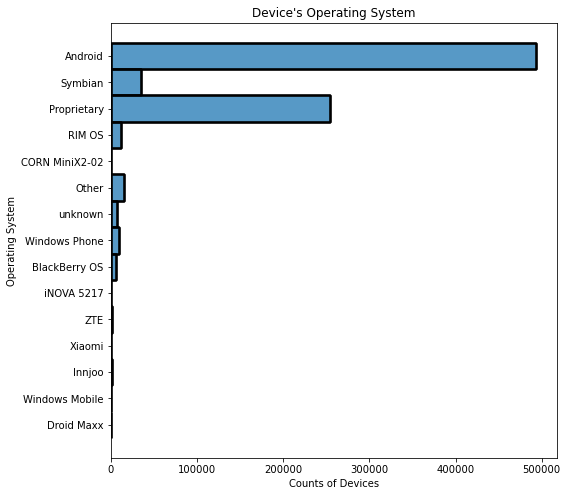

In [74]:
#Histogram chart
plt.figure(figsize=(8,8))
sns.histplot(data=stc_d, y='OS_NAME')
plt.title("Device's Operating System")
plt.ylabel("Operating System")
plt.xlabel("Counts of Devices")

In [75]:
stc_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 836526 entries, 0 to 1048574
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   CAL_DT            836526 non-null  object
 1   MODEL_NAME        836526 non-null  object
 2   BRAND_FULL_NAME   836526 non-null  object
 3   BRAND_NAME        836526 non-null  object
 4   VENDOR_NAME       836526 non-null  object
 5   OS_NAME           836526 non-null  object
 6   DEVICE_TYPE       836526 non-null  object
 7   _2G_FLG           836526 non-null  object
 8   _3G_FLG           836526 non-null  object
 9   _4G_FLG           836526 non-null  object
 10  WIFI_FLG          836526 non-null  object
 11  BLUETOOTH_FLG     836526 non-null  object
 12  TOUCH_SCREEN_FLG  836526 non-null  object
 13  DUAL_SIM_FLG      836526 non-null  object
 14  GENDER_TYPE_CD    836526 non-null  object
 15  AGE_B             836526 non-null  object
 16  NATIONALITY_CD    836526 non-null  ob

In [76]:
stc_d['CAL_DT'].unique()

array(['1/31/2019', '12/31/2019', '4/30/2020', '8/31/2019', '6/30/2019',
       '6/30/2020', '7/31/2020', '5/31/2020', '9/30/2020', '1/31/2020',
       '7/31/2019', '10/31/2019', '9/30/2019', '11/30/2019', '2/28/2019',
       '8/31/2020', '3/31/2020', '3/31/2019', '10/31/2020', '12/31/2018',
       '4/30/2019', '11/30/2018', '2/29/2020', '5/31/2019'], dtype=object)

In [77]:
stc_d['MODEL_NAME'].unique()

array(['One x9', 'C7-00', 'Blade V7 Lite', 'i6 Metal ONE', 'One M9',
       'ScanPal EDA50', 'Freddy Dual Sim', 'Xperia L', '101', 'Asha 311',
       'E51', 'Tribute HD', 'Y69', 'ZenFone Live ZB501KL Dual Sim',
       'Xperia XA1 Dual Sim', 'Grand2c', 'it1508', '1680 Classic',
       'itell s501', 'iris 820', 'E65', 'TY301', '2051 Dual',
       'Xperia Z1 LTE', 'SF1', '5800 XpressMusic',
       'Moto E LTE (2nd Generation)', '3120', 'BlackBerry 9810 Torch 2',
       'A3S Single Sim', 'F300', 'X2-01',
       'Moto G Dual Sim (2nd Generation)', 'Fx', 'it2180', '3510i',
       'One Touch 2012D', 'F6 Smartphone', '6 Dual Sim', 'NOTE 4 Pro',
       '7230', '3 Triple Sim', 'X155 Max', 'Xperia Z5 Premium Dual Sim',
       'A6000', 'F2', 'L56i', '301', '103', 'N82', 'ONE 3G HD', 'E5-00',
       '500', 'BL60', 'ELUGA I3', 'HOT S', 'F7', 'NOTE 4 5.7', 'Y21L',
       '3 A3000', 'Xperia Z3+ Dual', 'Xperia M2 Dual', 'N86',
       'Asha 205 Dual SIM', 'it5616', 'Desire 816 Dual Sim', 'Q300',
       

In [78]:
stc_d['BRAND_FULL_NAME'].unique()

array(['HTC One x9', 'Nokia C7-00', 'ZTE Blade V7 Lite', ..., 'AGM M2',
       'AVVIO L800', 'Xiaomi Mi A2 Lite'], dtype=object)

In [79]:
stc_d['BRAND_NAME'].unique()

array(['HTC', 'Nokia', 'ZTE', 'QMobile', 'Honeywell', 'Wiko', 'Sony',
       'LG', 'Vivo', 'ASUS', 'Lava', 'Itel', 'I-Life', 'CECT', 'Alcatel',
       'Obi', 'Motorola', 'RIM', 'Oppo', 'Tinmo', 'IKU', 'Gionee',
       'Infinix', 'Lenovo', 'Symphony', 'Innjoo', 'Panasonic', 'OnePlus',
       'QUISWISE', 'MOBO', 'Hope', 'VGO TEL', ' C112', 'BOCOIN', 'Xiaomi',
       'Tecno', 'Kechao', 'HEDY', 'Meizu', 'Four', 'Bird', 'CAT',
       'Sony Ericsson', 'Digiphone', 'CALME', 'Micromax', 'OLA',
       'Philips', 'Hisense', 'Glida', 'Mione', 'Lemon', 'Realme',
       'B.easy', 'Cloudfone', 'Sico', 'Darago', 'G-Tide', 'BlackBerry',
       'Tichips', 'Magnus', 'Google', 'Rivo', 'ENES', 'iBRIT', 'Lephone',
       'SPC', 'CORN', ' C12', 'L8star', 'Citycall', 'Walton', 'HOTWAV',
       'Letv', 'EUROSTAR & Device', 'UMI', 'FERO', 'Zebra', 'OALE',
       'Gfive', 'G.M', 'Star', 'ZTE Axon Mini Standard', 'Mphone',
       'OUKITEL', 'Eyang', 'Xiaomi Mi5 Standard', 'Innjoo Note Standard',
       'Koobee',

In [80]:
stc_d['VENDOR_NAME'].unique()

array(['Google', 'Nokia', 'Symbian LTD', 'CECT', 'Alcatel', 'RIM',
       'Tinmo Technology', 'IKU', 'ITEL', 'Symphony', 'QUISWISE', 'MOBO',
       'Hope', 'VGO TEL', ' C6500', 'More International Group Limited',
       'Kechao', 'HEDY', 'Aliyun', 'QMobile', 'Four', 'LG', 'Bird',
       'Sony Ericsson', 'Tecno Technology', 'Digiphone', 'CALME',
       'Gionee', 'Micromax', 'Philips', 'unknown', 'Microsoft', 'Lemon',
       'Motorola', 'B.easy', 'Sico', 'Darago', 'Wiko',
       'ZTS International', 'BlackBerry', 'Tichips', 'Magnus', 'Rivo',
       'Lephone', 'Corn', ' C3000', 'L8star', 'Citycall', 'Walton',
       'BOCOIN', 'FERO', 'Kingtech', 'Lava', 'Star', 'Express Logic',
       'Premium Edition', 'Eyang', 'Pro Edition', 'Innjoo', 'Anycool',
       'Kenxinda', 'K-Touch', 'BLU', 'KGTEL', 'iYou', 'Windows Mobile',
       'YAKOYA', 'GIVA', 'Bee', 'Aolixin Technology', 'Vell-Com',
       'i mobily', 'Doro AB', 'YXTEL', 'ZTC', 'Gfive', 'Beafon', 'Condor',
       'Bontel', 'Vmaxx', 'Karbo

In [81]:
stc_d['OS_NAME'].unique()

array(['Android', 'Symbian', 'Proprietary', 'RIM OS', 'CORN MiniX2-02',
       'Other', 'unknown', 'Windows Phone', 'BlackBerry OS', 'iNOVA 5217',
       'ZTE', 'Xiaomi', 'Innjoo', 'Windows Mobile', 'Droid Maxx'],
      dtype=object)

In [82]:
stc_d['DEVICE_TYPE'].unique()

array(['Smartphone', 'Mobile Phone', ' F1', '6700', 'Google',
       'Droid Mini'], dtype=object)

In [83]:
stc_d['_2G_FLG'].unique()

array(['Y', ' C112', ' C12', 'Android', 'N', 'Motorola'], dtype=object)

In [84]:
stc_d['_3G_FLG'].unique()

array(['Y', 'N', ' C6500', ' C3000', 'Smartphone', 'Google'], dtype=object)

In [85]:
stc_d['_4G_FLG'].unique()

array(['Y', 'N', 'CORN', 'iNOVA', 'Android'], dtype=object)

In [86]:
stc_d['WIFI_FLG'].unique()

array(['Y', 'N', 'CXTEL', 'Z', 'Ema Telecom', 'Smartphone'], dtype=object)

In [87]:
stc_d['BLUETOOTH_FLG'].unique()

array(['Y', 'N', 'Proprietary', 'Z'], dtype=object)

In [88]:
stc_d['TOUCH_SCREEN_FLG'].unique()

array(['Y', 'N', 'Mobile Phone', 'Z'], dtype=object)

In [89]:
stc_d['DUAL_SIM_FLG'].unique()

array(['Y', 'N', 'Z'], dtype=object)

In [90]:
stc_d['GENDER_TYPE_CD'].unique()

array(['Male', 'Female', 'N', 'Y'], dtype=object)

In [91]:
stc_d.drop(stc_d[(stc_d['GENDER_TYPE_CD']=='Y') |(stc_d['GENDER_TYPE_CD']== 'N')].index, axis=0,inplace=True)
stc_d

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,AGE_B,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
0,1/31/2019,One x9,HTC One x9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,36-55,LKA,Sri Lanka,Non-Saudi,9
3,12/31/2019,C7-00,Nokia C7-00,Nokia,Nokia,Symbian,Smartphone,Y,Y,N,Y,Y,Y,N,Male,18-25,BGD,Bangladesh,Non-Saudi,2
5,4/30/2020,Blade V7 Lite,ZTE Blade V7 Lite,ZTE,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,>55,IDN,Indonesia,Non-Saudi,1
6,8/31/2019,i6 Metal ONE,QMobile i6 Metal ONE,QMobile,Google,Android,Smartphone,Y,Y,N,Y,Y,Y,Y,Male,36-55,EGY,Egypt,Non-Saudi,1
8,6/30/2019,One M9,HTC One M9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,N,Male,26-35,SYR,Syria,Non-Saudi,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,3/31/2019,E4,QMobile E4,QMobile,QMobile,Proprietary,Mobile Phone,Y,N,N,N,Y,N,Y,Male,>55,SDN,Sudan,Non-Saudi,2
1048569,1/31/2019,F3,Oppo F3,Oppo,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,36-55,DZA,Algeria,Non-Saudi,1
1048572,5/31/2019,X2-00,Nokia X2-00,Nokia,Nokia,Proprietary,Mobile Phone,Y,N,N,N,Y,N,N,Male,36-55,SYR,Syria,Non-Saudi,16
1048573,7/31/2019,Desire 626 NFC Dual Sim,HTC Desire 626 NFC Dual Sim,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,>55,BGD,Bangladesh,Non-Saudi,7


In [92]:
stc_d['GENDER_TYPE_CD'].unique()

array(['Male', 'Female'], dtype=object)

In [93]:
stc_d['AGE_B'].unique()

array(['36-55', '18-25', '>55  ', '26-35', 'NA   ', '<18  '], dtype=object)

In [94]:
stc_d.drop(stc_d[(stc_d['AGE_B']=='Y') | (stc_d['AGE_B']== 'N') | (stc_d['AGE_B']== 'NA   ')].index, axis=0,inplace=True)
stc_d

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,AGE_B,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
0,1/31/2019,One x9,HTC One x9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,36-55,LKA,Sri Lanka,Non-Saudi,9
3,12/31/2019,C7-00,Nokia C7-00,Nokia,Nokia,Symbian,Smartphone,Y,Y,N,Y,Y,Y,N,Male,18-25,BGD,Bangladesh,Non-Saudi,2
5,4/30/2020,Blade V7 Lite,ZTE Blade V7 Lite,ZTE,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,>55,IDN,Indonesia,Non-Saudi,1
6,8/31/2019,i6 Metal ONE,QMobile i6 Metal ONE,QMobile,Google,Android,Smartphone,Y,Y,N,Y,Y,Y,Y,Male,36-55,EGY,Egypt,Non-Saudi,1
8,6/30/2019,One M9,HTC One M9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,N,Male,26-35,SYR,Syria,Non-Saudi,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,3/31/2019,E4,QMobile E4,QMobile,QMobile,Proprietary,Mobile Phone,Y,N,N,N,Y,N,Y,Male,>55,SDN,Sudan,Non-Saudi,2
1048569,1/31/2019,F3,Oppo F3,Oppo,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,36-55,DZA,Algeria,Non-Saudi,1
1048572,5/31/2019,X2-00,Nokia X2-00,Nokia,Nokia,Proprietary,Mobile Phone,Y,N,N,N,Y,N,N,Male,36-55,SYR,Syria,Non-Saudi,16
1048573,7/31/2019,Desire 626 NFC Dual Sim,HTC Desire 626 NFC Dual Sim,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,>55,BGD,Bangladesh,Non-Saudi,7


In [95]:
stc_d['AGE_B'].unique()

array(['36-55', '18-25', '>55  ', '26-35', '<18  '], dtype=object)

In [96]:
stc_d['NATIONALITY_CD'].unique()

array(['LKA', 'BGD', 'IDN', 'EGY', 'SYR', 'SAU', 'MRT', 'SDN', 'PAK',
       'UGA', 'YEM', 'MDG', 'IND', 'AFG', 'GBR', 'GHA', 'CYM', 'CMR',
       'ITA', 'SOM', 'NER', 'MAR', 'LBN', 'TUR', 'BHR', 'NPL', 'PHL',
       'LBY', 'BEL', 'ETH', 'UKR', 'OMN', 'NGA', 'TCD', 'NAM', 'JOR',
       'KGZ', 'BFA', 'TUN', 'PSE', 'IRN', 'IRQ', 'UZB', 'MYS', 'CHN',
       'DZA', 'KEN', 'ERI', 'MLI', 'IRL', 'CAN', 'ZAF', 'HND', 'MLT',
       'ALB', 'ARE', 'ROM', 'FRA', 'KWT', 'MOZ', 'THA', 'ESP', 'DEU',
       'CIV', 'BRN', 'SGP', 'TJK', 'LAO', 'AIA', 'DNK', 'BIH', 'BDI',
       'MWI', 'ATG', 'AUS', 'GIN', 'VNM', 'SLE', 'QAT', 'ARM', 'AND',
       'TGO', 'CUB', 'SRB', 'BTN', 'TZA', 'SEN', 'GRC', 'SVK', 'ANT',
       'POL', 'KOR', 'CAF', 'AZE', 'SWE', 'MUS', 'GMB', 'DJI', 'JPN',
       'MAD IS', 'ABW', 'BRB', 'KAZ', 'HRV', 'AUT', 'FIN', 'GUF', 'FRO',
       'BMU', 'LBR', 'VEN', 'NZL', 'COL', 'KHM', 'PRT', 'TWN', 'BEN',
       'BLR', 'NCL', 'TKM', 'COM', 'BRA', 'COK', 'CZE', 'NOR', 'CHL',
       'BGR', 'MK

In [97]:
stc_d.drop(stc_d[(stc_d['NATIONALITY_CD']=='Female') | (stc_d['AGE_B']== 'N') | (stc_d['NATIONALITY_CD']== 'Male')].index, axis=0,inplace=True)
stc_d

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,AGE_B,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
0,1/31/2019,One x9,HTC One x9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,36-55,LKA,Sri Lanka,Non-Saudi,9
3,12/31/2019,C7-00,Nokia C7-00,Nokia,Nokia,Symbian,Smartphone,Y,Y,N,Y,Y,Y,N,Male,18-25,BGD,Bangladesh,Non-Saudi,2
5,4/30/2020,Blade V7 Lite,ZTE Blade V7 Lite,ZTE,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,>55,IDN,Indonesia,Non-Saudi,1
6,8/31/2019,i6 Metal ONE,QMobile i6 Metal ONE,QMobile,Google,Android,Smartphone,Y,Y,N,Y,Y,Y,Y,Male,36-55,EGY,Egypt,Non-Saudi,1
8,6/30/2019,One M9,HTC One M9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,N,Male,26-35,SYR,Syria,Non-Saudi,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,3/31/2019,E4,QMobile E4,QMobile,QMobile,Proprietary,Mobile Phone,Y,N,N,N,Y,N,Y,Male,>55,SDN,Sudan,Non-Saudi,2
1048569,1/31/2019,F3,Oppo F3,Oppo,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,36-55,DZA,Algeria,Non-Saudi,1
1048572,5/31/2019,X2-00,Nokia X2-00,Nokia,Nokia,Proprietary,Mobile Phone,Y,N,N,N,Y,N,N,Male,36-55,SYR,Syria,Non-Saudi,16
1048573,7/31/2019,Desire 626 NFC Dual Sim,HTC Desire 626 NFC Dual Sim,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,>55,BGD,Bangladesh,Non-Saudi,7


In [98]:
stc_d['NATIONALITY_CD'].unique()

array(['LKA', 'BGD', 'IDN', 'EGY', 'SYR', 'SAU', 'MRT', 'SDN', 'PAK',
       'UGA', 'YEM', 'MDG', 'IND', 'AFG', 'GBR', 'GHA', 'CYM', 'CMR',
       'ITA', 'SOM', 'NER', 'MAR', 'LBN', 'TUR', 'BHR', 'NPL', 'PHL',
       'LBY', 'BEL', 'ETH', 'UKR', 'OMN', 'NGA', 'TCD', 'NAM', 'JOR',
       'KGZ', 'BFA', 'TUN', 'PSE', 'IRN', 'IRQ', 'UZB', 'MYS', 'CHN',
       'DZA', 'KEN', 'ERI', 'MLI', 'IRL', 'CAN', 'ZAF', 'HND', 'MLT',
       'ALB', 'ARE', 'ROM', 'FRA', 'KWT', 'MOZ', 'THA', 'ESP', 'DEU',
       'CIV', 'BRN', 'SGP', 'TJK', 'LAO', 'AIA', 'DNK', 'BIH', 'BDI',
       'MWI', 'ATG', 'AUS', 'GIN', 'VNM', 'SLE', 'QAT', 'ARM', 'AND',
       'TGO', 'CUB', 'SRB', 'BTN', 'TZA', 'SEN', 'GRC', 'SVK', 'ANT',
       'POL', 'KOR', 'CAF', 'AZE', 'SWE', 'MUS', 'GMB', 'DJI', 'JPN',
       'MAD IS', 'ABW', 'BRB', 'KAZ', 'HRV', 'AUT', 'FIN', 'GUF', 'FRO',
       'BMU', 'LBR', 'VEN', 'NZL', 'COL', 'KHM', 'PRT', 'TWN', 'BEN',
       'BLR', 'NCL', 'TKM', 'COM', 'BRA', 'COK', 'CZE', 'NOR', 'CHL',
       'BGR', 'MK

In [99]:
stc_d['NATIONALITY_NAME'].unique()

array(['Sri Lanka', 'Bangladesh', 'Indonesia', 'Egypt', 'Syria',
       'Saudi Arabia', 'Mauritania', 'Sudan', 'Pakistan', 'Uganda',
       'Yemen', 'Madagascar', 'India', 'Afghanistan', 'United Kingdom',
       'Ghana', 'Cayman Islands', 'Cameroon', 'Italy', 'Somalia', 'Niger',
       'Morocco', 'Lebanon', 'Turkey', 'Bahrain', 'Nepal', 'Philippines',
       'Libya', 'Belgium', 'Ethiopia', 'Ukraine', 'Oman', 'Nigerian',
       'Chad', 'Namibia', 'Jordan', 'Kyrgyzstan', 'Burkina Faso',
       'Tunisia', 'Palestine', 'Iran', 'Iraq', 'Uzbekistan', 'Malaysia',
       'China', 'Algeria', 'Kenya', 'Eritrea', 'Mali', 'Ireland',
       'Canada', 'South Africa', 'Honduras', 'Malta', 'Albania',
       'United Arab Emirates', 'Romania', 'France', 'Kuwait',
       'Mozambique', 'Thailand', 'Spain', 'Germany', 'Cote De Voire',
       'Brunei', 'Singapore', 'Tajikistan', 'Laos', 'Anguilla', 'Denmark',
       'Bosnia and Herzegovina', 'Burundi', 'Malawi', 'Antigua',
       'Australia', 'Guinea', 'Vie

In [100]:
stc_d.drop(stc_d[(stc_d['NATIONALITY_NAME']=='18-25') | (stc_d['NATIONALITY_NAME']== '<18  ') | (stc_d['NATIONALITY_NAME']== 'N') | (stc_d['NATIONALITY_NAME']== 'NA   ')].index, axis=0,inplace=True)
stc_d

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,AGE_B,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
0,1/31/2019,One x9,HTC One x9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,36-55,LKA,Sri Lanka,Non-Saudi,9
3,12/31/2019,C7-00,Nokia C7-00,Nokia,Nokia,Symbian,Smartphone,Y,Y,N,Y,Y,Y,N,Male,18-25,BGD,Bangladesh,Non-Saudi,2
5,4/30/2020,Blade V7 Lite,ZTE Blade V7 Lite,ZTE,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,>55,IDN,Indonesia,Non-Saudi,1
6,8/31/2019,i6 Metal ONE,QMobile i6 Metal ONE,QMobile,Google,Android,Smartphone,Y,Y,N,Y,Y,Y,Y,Male,36-55,EGY,Egypt,Non-Saudi,1
8,6/30/2019,One M9,HTC One M9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,N,Male,26-35,SYR,Syria,Non-Saudi,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,3/31/2019,E4,QMobile E4,QMobile,QMobile,Proprietary,Mobile Phone,Y,N,N,N,Y,N,Y,Male,>55,SDN,Sudan,Non-Saudi,2
1048569,1/31/2019,F3,Oppo F3,Oppo,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,36-55,DZA,Algeria,Non-Saudi,1
1048572,5/31/2019,X2-00,Nokia X2-00,Nokia,Nokia,Proprietary,Mobile Phone,Y,N,N,N,Y,N,N,Male,36-55,SYR,Syria,Non-Saudi,16
1048573,7/31/2019,Desire 626 NFC Dual Sim,HTC Desire 626 NFC Dual Sim,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,>55,BGD,Bangladesh,Non-Saudi,7


In [101]:
stc_d['NATIONALITY_NAME'].unique()

array(['Sri Lanka', 'Bangladesh', 'Indonesia', 'Egypt', 'Syria',
       'Saudi Arabia', 'Mauritania', 'Sudan', 'Pakistan', 'Uganda',
       'Yemen', 'Madagascar', 'India', 'Afghanistan', 'United Kingdom',
       'Ghana', 'Cayman Islands', 'Cameroon', 'Italy', 'Somalia', 'Niger',
       'Morocco', 'Lebanon', 'Turkey', 'Bahrain', 'Nepal', 'Philippines',
       'Libya', 'Belgium', 'Ethiopia', 'Ukraine', 'Oman', 'Nigerian',
       'Chad', 'Namibia', 'Jordan', 'Kyrgyzstan', 'Burkina Faso',
       'Tunisia', 'Palestine', 'Iran', 'Iraq', 'Uzbekistan', 'Malaysia',
       'China', 'Algeria', 'Kenya', 'Eritrea', 'Mali', 'Ireland',
       'Canada', 'South Africa', 'Honduras', 'Malta', 'Albania',
       'United Arab Emirates', 'Romania', 'France', 'Kuwait',
       'Mozambique', 'Thailand', 'Spain', 'Germany', 'Cote De Voire',
       'Brunei', 'Singapore', 'Tajikistan', 'Laos', 'Anguilla', 'Denmark',
       'Bosnia and Herzegovina', 'Burundi', 'Malawi', 'Antigua',
       'Australia', 'Guinea', 'Vie

In [102]:
stc_d['SAUDI_NON_SAUDI'].unique()

array(['Non-Saudi', 'Saudi'], dtype=object)

In [103]:
stc_d.drop(stc_d[(stc_d['SAUDI_NON_SAUDI']=='Male') | (stc_d['SAUDI_NON_SAUDI']== 'Female') | (stc_d['SAUDI_NON_SAUDI']== 'N')].index, axis=0,inplace=True)
stc_d

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,AGE_B,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
0,1/31/2019,One x9,HTC One x9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,36-55,LKA,Sri Lanka,Non-Saudi,9
3,12/31/2019,C7-00,Nokia C7-00,Nokia,Nokia,Symbian,Smartphone,Y,Y,N,Y,Y,Y,N,Male,18-25,BGD,Bangladesh,Non-Saudi,2
5,4/30/2020,Blade V7 Lite,ZTE Blade V7 Lite,ZTE,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,>55,IDN,Indonesia,Non-Saudi,1
6,8/31/2019,i6 Metal ONE,QMobile i6 Metal ONE,QMobile,Google,Android,Smartphone,Y,Y,N,Y,Y,Y,Y,Male,36-55,EGY,Egypt,Non-Saudi,1
8,6/30/2019,One M9,HTC One M9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,N,Male,26-35,SYR,Syria,Non-Saudi,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,3/31/2019,E4,QMobile E4,QMobile,QMobile,Proprietary,Mobile Phone,Y,N,N,N,Y,N,Y,Male,>55,SDN,Sudan,Non-Saudi,2
1048569,1/31/2019,F3,Oppo F3,Oppo,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,36-55,DZA,Algeria,Non-Saudi,1
1048572,5/31/2019,X2-00,Nokia X2-00,Nokia,Nokia,Proprietary,Mobile Phone,Y,N,N,N,Y,N,N,Male,36-55,SYR,Syria,Non-Saudi,16
1048573,7/31/2019,Desire 626 NFC Dual Sim,HTC Desire 626 NFC Dual Sim,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,>55,BGD,Bangladesh,Non-Saudi,7


In [104]:
stc_d['SAUDI_NON_SAUDI'].unique()

array(['Non-Saudi', 'Saudi'], dtype=object)

In [105]:
stc_d['DEVICE_COUNT'].unique()

array(['9', '2', '1', ..., '32685', '602', '12023'], dtype=object)

In [106]:
stc_d["CAL_DT"]=pd.to_datetime(stc_d["CAL_DT"]).dt.strftime('%Y')

In [107]:
stc_d.head()

,CAL_DT,MODEL_NAME,BRAND_FULL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,BLUETOOTH_FLG,TOUCH_SCREEN_FLG,DUAL_SIM_FLG,GENDER_TYPE_CD,AGE_B,NATIONALITY_CD,NATIONALITY_NAME,SAUDI_NON_SAUDI,DEVICE_COUNT
0,2019,One x9,HTC One x9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Male,36-55,LKA,Sri Lanka,Non-Saudi,9
3,2019,C7-00,Nokia C7-00,Nokia,Nokia,Symbian,Smartphone,Y,Y,N,Y,Y,Y,N,Male,18-25,BGD,Bangladesh,Non-Saudi,2
5,2020,Blade V7 Lite,ZTE Blade V7 Lite,ZTE,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,Y,Female,>55,IDN,Indonesia,Non-Saudi,1
6,2019,i6 Metal ONE,QMobile i6 Metal ONE,QMobile,Google,Android,Smartphone,Y,Y,N,Y,Y,Y,Y,Male,36-55,EGY,Egypt,Non-Saudi,1
8,2019,One M9,HTC One M9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,Y,Y,N,Male,26-35,SYR,Syria,Non-Saudi,21


In [108]:
stc_d.drop(columns="BRAND_FULL_NAME",axis=1,inplace=True)

In [109]:
stc_d.drop(columns="NATIONALITY_CD",axis=1,inplace=True)

In [110]:
stc_d["CAL_DT"]=pd.to_datetime(stc_d["CAL_DT"])

In [111]:
stc_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714023 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   CAL_DT            714023 non-null  datetime64[ns]
 1   MODEL_NAME        714023 non-null  object        
 2   BRAND_NAME        714023 non-null  object        
 3   VENDOR_NAME       714023 non-null  object        
 4   OS_NAME           714023 non-null  object        
 5   DEVICE_TYPE       714023 non-null  object        
 6   _2G_FLG           714023 non-null  object        
 7   _3G_FLG           714023 non-null  object        
 8   _4G_FLG           714023 non-null  object        
 9   WIFI_FLG          714023 non-null  object        
 10  BLUETOOTH_FLG     714023 non-null  object        
 11  TOUCH_SCREEN_FLG  714023 non-null  object        
 12  DUAL_SIM_FLG      714023 non-null  object        
 13  GENDER_TYPE_CD    714023 non-null  object        
 14  AGE

In [112]:
stc_d["DEVICE_COUNT"]=stc_d["DEVICE_COUNT"].astype(str).astype(int)

In [113]:
stc_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714023 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   CAL_DT            714023 non-null  datetime64[ns]
 1   MODEL_NAME        714023 non-null  object        
 2   BRAND_NAME        714023 non-null  object        
 3   VENDOR_NAME       714023 non-null  object        
 4   OS_NAME           714023 non-null  object        
 5   DEVICE_TYPE       714023 non-null  object        
 6   _2G_FLG           714023 non-null  object        
 7   _3G_FLG           714023 non-null  object        
 8   _4G_FLG           714023 non-null  object        
 9   WIFI_FLG          714023 non-null  object        
 10  BLUETOOTH_FLG     714023 non-null  object        
 11  TOUCH_SCREEN_FLG  714023 non-null  object        
 12  DUAL_SIM_FLG      714023 non-null  object        
 13  GENDER_TYPE_CD    714023 non-null  object        
 14  AGE

In [114]:
le = preprocessing.LabelEncoder()
stc_d["2G_FLG"]=le.fit_transform(stc_d["_2G_FLG"])
stc_d["3G_FLG"]=le.fit_transform(stc_d["_3G_FLG"])
stc_d["4G_FLG"]=le.fit_transform(stc_d["_4G_FLG"])
stc_d["WIFI"]=le.fit_transform(stc_d["WIFI_FLG"])
stc_d["BLUETOOTH"]=le.fit_transform(stc_d["BLUETOOTH_FLG"])
stc_d["TOUCH_SCREEN"]=le.fit_transform(stc_d["TOUCH_SCREEN_FLG"])
stc_d["DUAL_SIM"]=le.fit_transform(stc_d["DUAL_SIM_FLG"])
stc_d["GENDER"]=le.fit_transform(stc_d["GENDER_TYPE_CD"])
stc_d["MODEL"]=le.fit_transform(stc_d["MODEL_NAME"])
stc_d["BRAND"]=le.fit_transform(stc_d["BRAND_NAME"])
stc_d["VENDOR"]=le.fit_transform(stc_d["VENDOR_NAME"])
stc_d["OS"]=le.fit_transform(stc_d["OS_NAME"])
stc_d["DEVICE"]=le.fit_transform(stc_d["DEVICE_TYPE"])
stc_d["AGE"]=le.fit_transform(stc_d["AGE_B"])
stc_d["NATIONALITY"]=le.fit_transform(stc_d["NATIONALITY_NAME"])
stc_d["SAUDI"]=le.fit_transform(stc_d["SAUDI_NON_SAUDI"])

In [115]:
stc_d.head()

,CAL_DT,MODEL_NAME,BRAND_NAME,VENDOR_NAME,OS_NAME,DEVICE_TYPE,_2G_FLG,_3G_FLG,_4G_FLG,WIFI_FLG,...,DUAL_SIM,GENDER,MODEL,BRAND,VENDOR,OS,DEVICE,AGE,NATIONALITY,SAUDI
0,2019-01-01,One x9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,...,1,1,510,68,40,0,1,2,168,0
3,2019-01-01,C7-00,Nokia,Nokia,Symbian,Smartphone,Y,Y,N,Y,...,0,1,244,118,68,5,1,0,16,0
5,2020-01-01,Blade V7 Lite,ZTE,Google,Android,Smartphone,Y,Y,Y,Y,...,1,0,231,186,40,0,1,4,88,0
6,2019-01-01,i6 Metal ONE,QMobile,Google,Android,Smartphone,Y,Y,N,Y,...,1,1,794,133,40,0,1,2,62,0
8,2019-01-01,One M9,HTC,Google,Android,Smartphone,Y,Y,Y,Y,...,0,1,488,68,40,0,1,1,173,0


In [120]:


stc_d.drop(columns="_4G_FLG",axis=1,inplace=True)
stc_d.drop(columns="WIFI_FLG",axis=1,inplace=True)
stc_d.drop(columns="MODEL_NAME",axis=1,inplace=True)
stc_d.drop(columns="OS_NAME",axis=1,inplace=True)
stc_d.drop(columns="VENDOR_NAME",axis=1,inplace=True)
stc_d.drop(columns="BRAND_NAME",axis=1,inplace=True)
stc_d.drop(columns="DEVICE_TYPE",axis=1,inplace=True)
stc_d.drop(columns="SAUDI_NON_SAUDI",axis=1,inplace=True)
stc_d.drop(columns="NATIONALITY_NAME",axis=1,inplace=True)
stc_d.drop(columns="AGE_B",axis=1,inplace=True)
stc_d.drop(columns="GENDER_TYPE_CD",axis=1,inplace=True)
stc_d.drop(columns="DUAL_SIM_FLG",axis=1,inplace=True)
stc_d.drop(columns="TOUCH_SCREEN_FLG",axis=1,inplace=True)
stc_d.drop(columns="BLUETOOTH_FLG",axis=1,inplace=True)

In [121]:
stc_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714023 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   CAL_DT        714023 non-null  datetime64[ns]
 1   DEVICE_COUNT  714023 non-null  int32         
 2   2G_FLG        714023 non-null  int32         
 3   3G_FLG        714023 non-null  int32         
 4   4G_FLG        714023 non-null  int32         
 5   WIFI          714023 non-null  int32         
 6   BLUETOOTH     714023 non-null  int32         
 7   TOUCH_SCREEN  714023 non-null  int32         
 8   DUAL_SIM      714023 non-null  int32         
 9   GENDER        714023 non-null  int32         
 10  MODEL         714023 non-null  int32         
 11  BRAND         714023 non-null  int32         
 12  VENDOR        714023 non-null  int32         
 13  OS            714023 non-null  int32         
 14  DEVICE        714023 non-null  int32         
 15  AGE           71

In [122]:
stc_d.head()

,CAL_DT,DEVICE_COUNT,2G_FLG,3G_FLG,4G_FLG,WIFI,BLUETOOTH,TOUCH_SCREEN,DUAL_SIM,GENDER,MODEL,BRAND,VENDOR,OS,DEVICE,AGE,NATIONALITY,SAUDI
0,2019-01-01,9,1,1,1,1,1,1,1,1,510,68,40,0,1,2,168,0
3,2019-01-01,2,1,1,0,1,1,1,0,1,244,118,68,5,1,0,16,0
5,2020-01-01,1,1,1,1,1,1,1,1,0,231,186,40,0,1,4,88,0
6,2019-01-01,1,1,1,0,1,1,1,1,1,794,133,40,0,1,2,62,0
8,2019-01-01,21,1,1,1,1,1,1,0,1,488,68,40,0,1,1,173,0


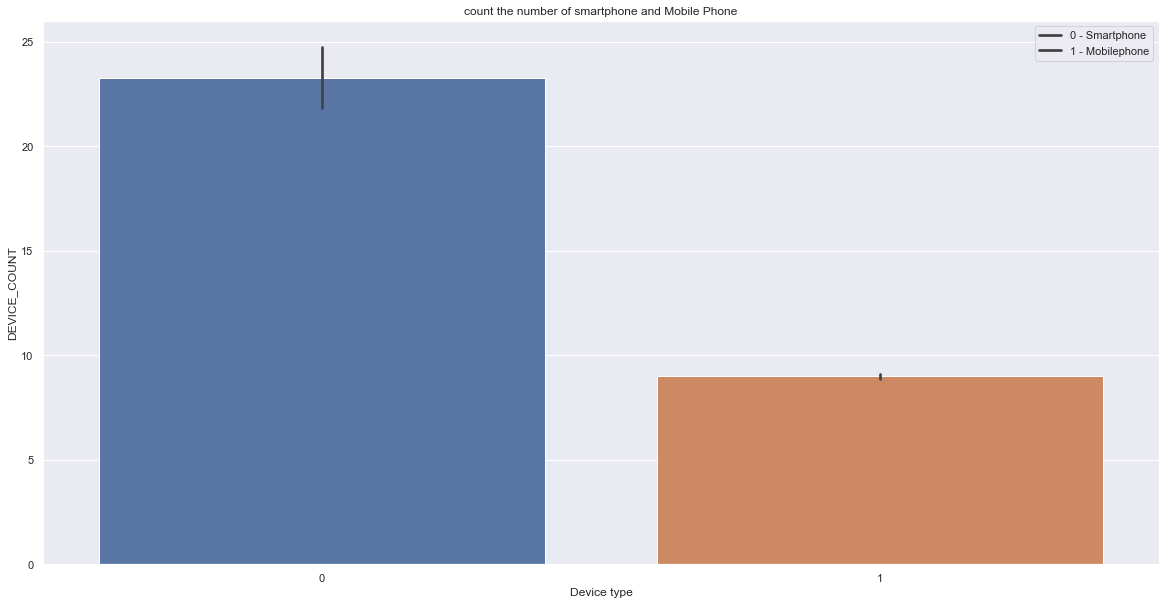

In [217]:
plt.figure(figsize= (20,10)) # size
plt.title('count the number of smartphone and Mobile Phone')# title 
sns.barplot( x =stc_d['DEVICE'],  y = stc_d['DEVICE_COUNT']);
plt.xlabel('Device type');
plt.legend(['0 - Smartphone' , '1 - Mobilephone']);

In [139]:
num_2 = (stc_d['2G_FLG'] == 1 ).sum()
num_3 = (stc_d['3G_FLG'] == 1 ).sum()
num_4 = (stc_d['4G_FLG'] == 1 ).sum()

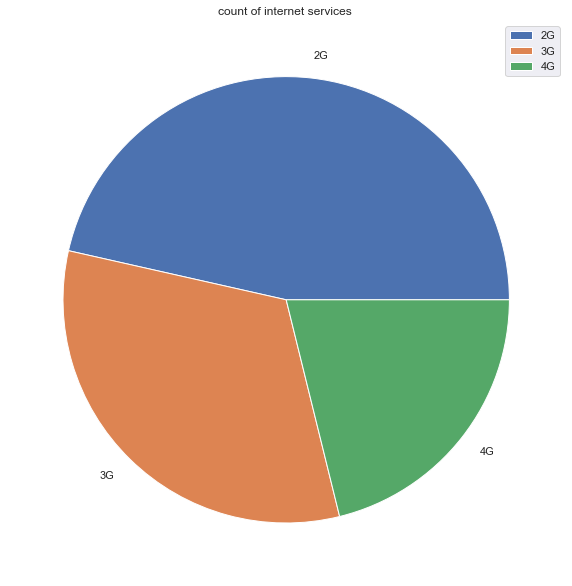

In [158]:
plt.figure(figsize= (10,20)) # SIZE
plt.title('count of internet services ') # title
num = [num_2 , num_3 , num_4] 
label = ['2G' , '3G' , '4G'] 
plt.pie(num , labels= label);
plt.legend(); # legend
sns.set()
sns.color_palette('pastel');

In [167]:
m = (stc_d['GENDER'] == 1 ).sum()
f = (stc_d['GENDER'] == 0 ).sum()

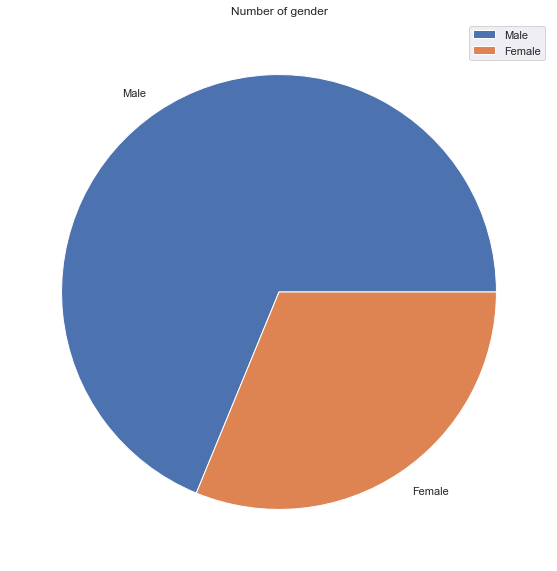

In [182]:
plt.figure(figsize= (10,10)) # SIZE
plt.title('Number of gender' ) # title
num_gen = [m , f ] # number of man and female
label = ['Male' , 'Female'] 
plt.pie(num_gen , labels= label);
plt.legend(); # legend
sns.set()
sns.color_palette('pastel');

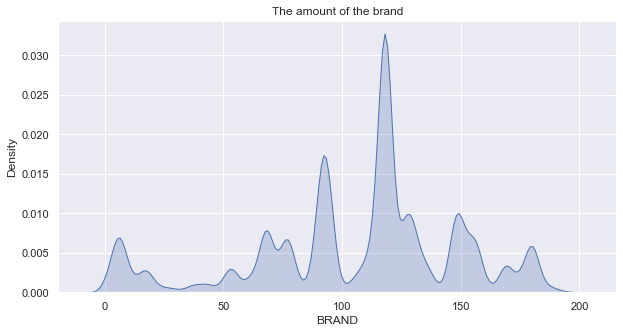

In [180]:
plt.figure(figsize=(10,5));
plt.title('The amount of the brand');
sns.kdeplot(data = stc_d['BRAND'] , shade = True); # blue 

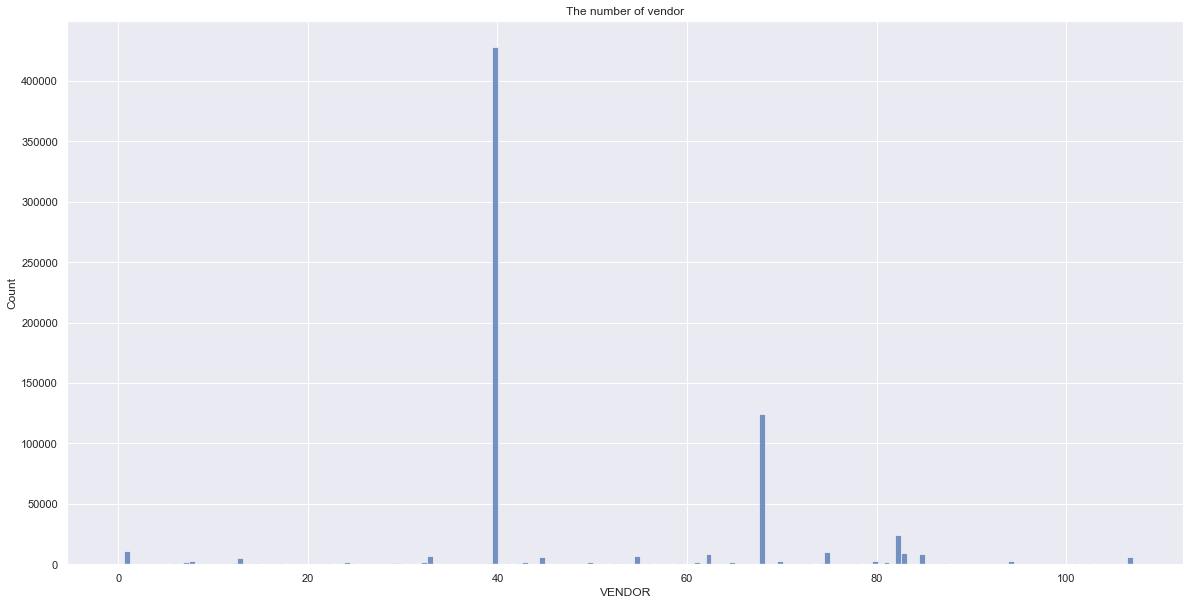

In [227]:
plt.figure(figsize=(20,10));
plt.title('The number of vendor')
sns.histplot(data = stc_d['VENDOR']);

In [237]:
a0 = (stc_d['AGE'] == 0).sum()
a1=(stc_d['AGE'] == 1).sum()
a2 = (stc_d['AGE'] == 2).sum()
a3 = (stc_d['AGE'] == 3).sum()
a4 = (stc_d['AGE'] == 4).sum()
l = ['<18' , '18-25' , '26-35','36-55','>55']
a = [a0 , a1 , a2 , a3 , a4 ]


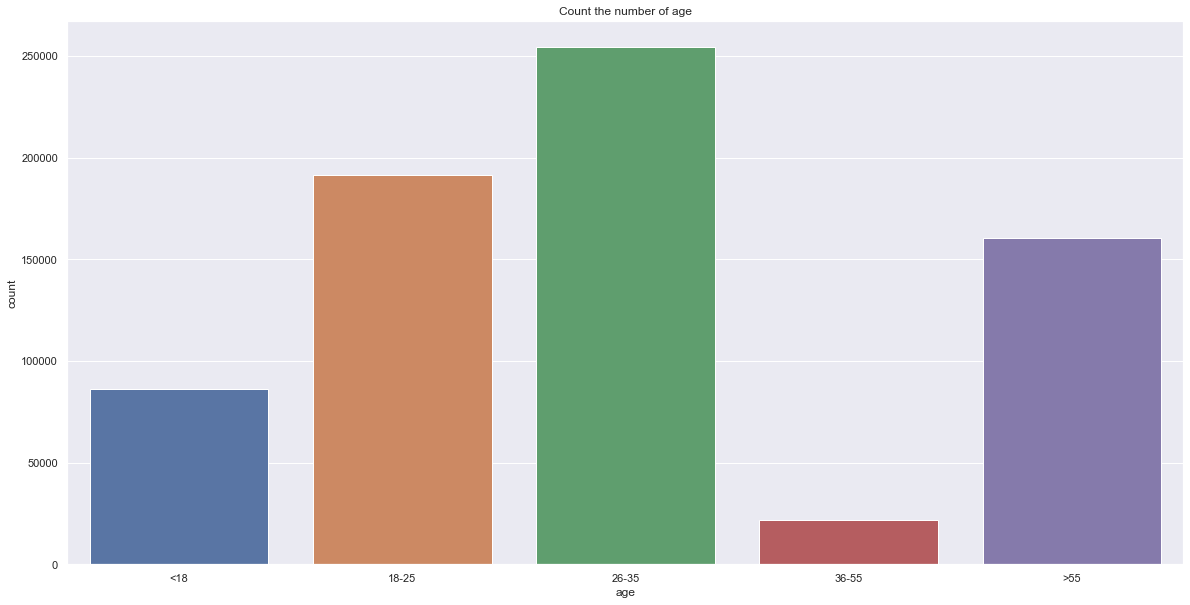

In [243]:
plt.figure(figsize=(20,10));
plt.title('Count the number of age');
plt.xlabel('age');
plt.ylabel('count');
sns.barplot(data=stc_d, x=l, y=a);